# Importing Libraries and Dataset

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,r2_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report,confusion_matrix,r2_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/train.csv')
data=df.copy()
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


#Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [ ]:
data.drop(['id'],inplace=True,axis=1)
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
data.describe(include='O')

2021-04-08 19:43:32.221 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [ ]:
data.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Univariate Analysis</h1>
<a id=2></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Gender</h1>
<a id=3></a>

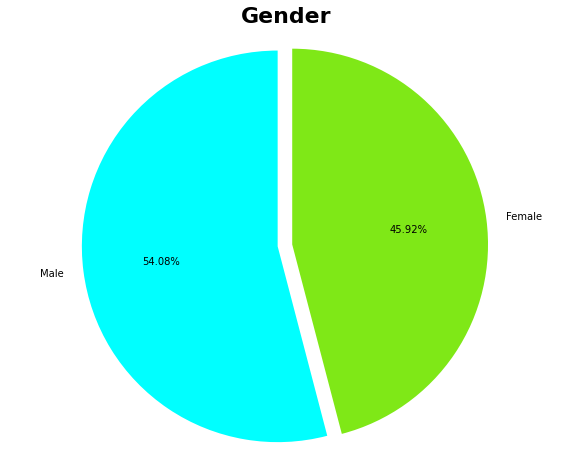

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(data.Gender.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#00FFFF','#7FE817'],radius=4,labels=['Male','Female'])
plt.title('Gender',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

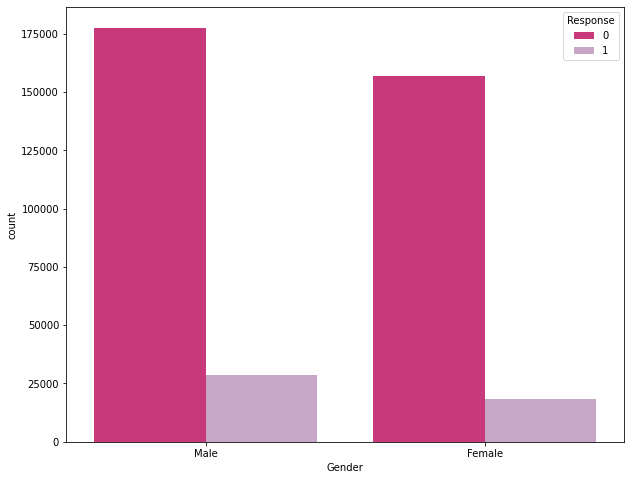

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data.Gender,hue=data.Response,palette='PuRd_r')
plt.show()

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Vehical Age</h1>
<a id=4></a>

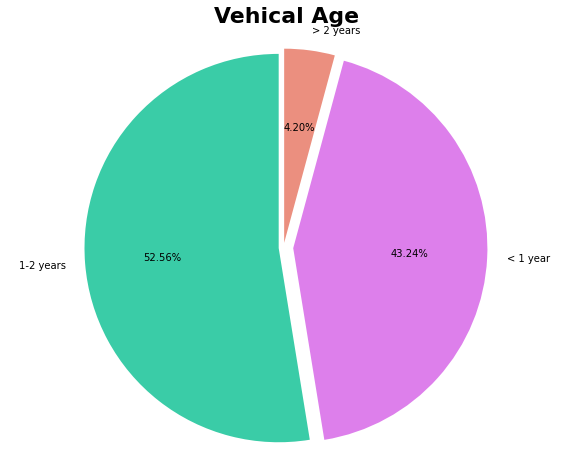

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Age.value_counts(),explode=[.1,.2,.1],startangle=90,autopct='%.2f%%',radius=4,colors=['#3ACCA7','#DD7FEB','#EB8F7F'],labels=['1-2 years','< 1 year','> 2 years'])
plt.title('Vehical Age',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

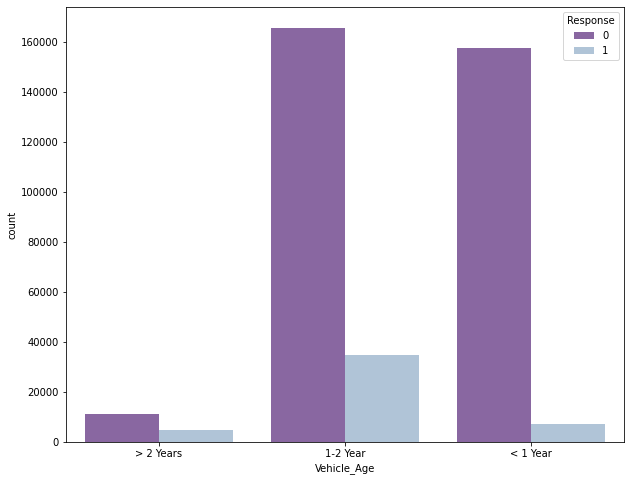

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Age,hue=data.Response,palette='BuPu_r')
plt.show()

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Vehicle Damage</h1>
<a id=5></a>

In [ ]:
data.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

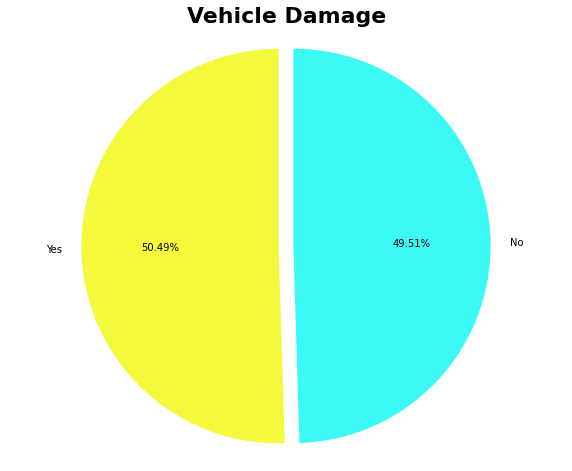

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(data.Vehicle_Damage.value_counts(),explode=[.1,.2],startangle=90,autopct='%.2f%%',colors=['#F4F93B','#3BF9F5'],radius=4,labels=['Yes','No'])
plt.title('Vehicle Damage',fontdict={'fontsize':22,'fontweight':'bold'})
plt.axis('equal')
plt.show()

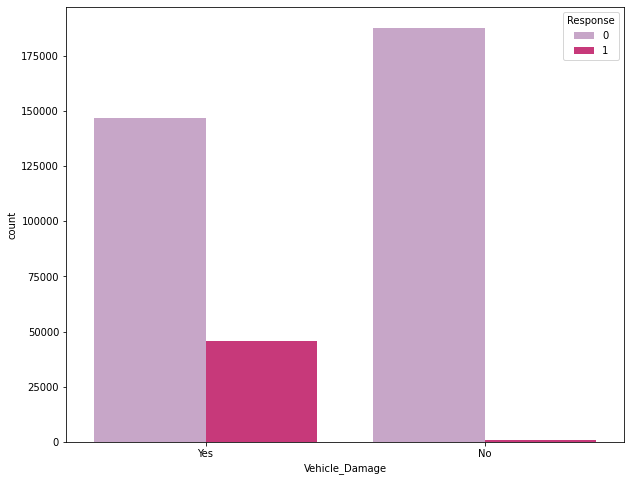

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data.Vehicle_Damage,hue=data.Response,palette='PuRd')
plt.show()

Here it is quite evident that vehicle damage is highly correlated with, the feature that is that was previously insured?


<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Age</h1>
<a id=6></a>

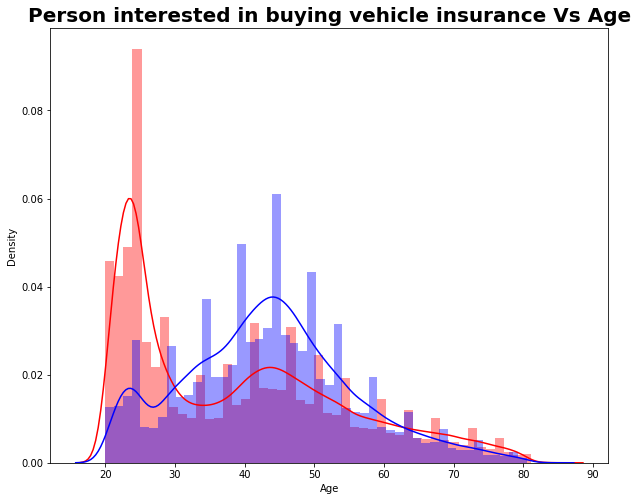

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==1],color='blue')
plt.title('Person interested in buying vehicle insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

Age group of 40-50 have higher chance of buying the vehicle insurance

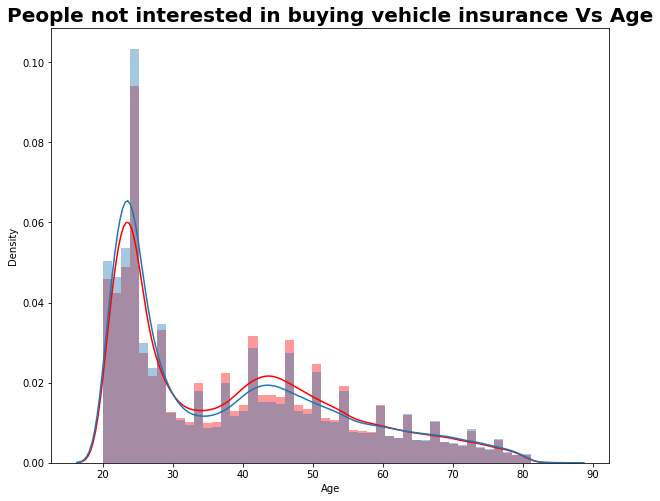

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,color='red',label='Age')
sns.distplot(data.Age[data.Response==0])
plt.title('People not interested in buying vehicle insurance Vs Age',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">correlation</h1>
<a id=8></a>

In [ ]:
correlation=data.corr()
correlation[['Age']].sort_values(by='Age',ascending=False).style.background_gradient(cmap='Blues_r')

,Age
Age,1.000000
Response,0.111147
Annual_Premium,0.067507
Region_Code,0.042574
Vintage,-0.001264
Driving_License,-0.079782
Previously_Insured,-0.254682
Policy_Sales_Channel,-0.577826



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Annual premium</h1>
<a id=9></a>

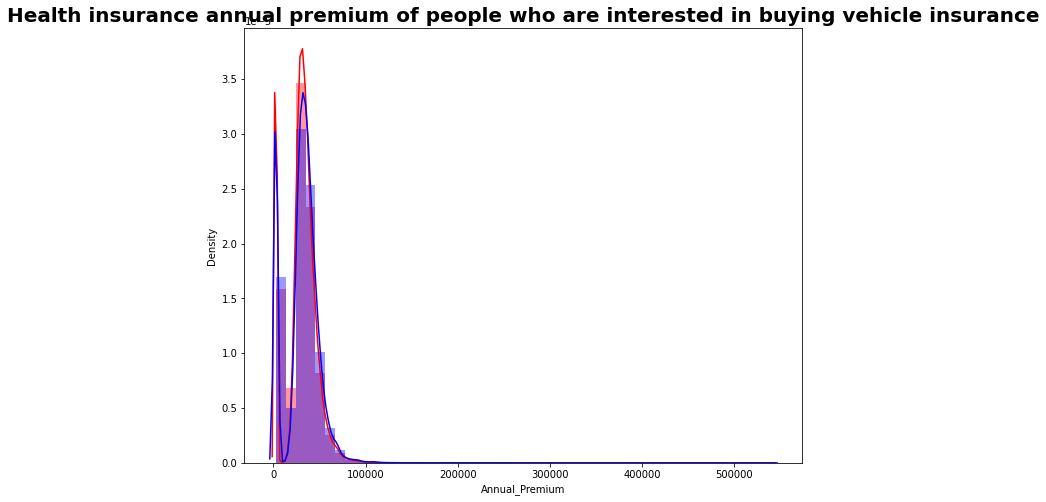

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(data.Annual_Premium[data.Response==1],color='blue')
plt.title('Health insurance annual premium of people who are interested in buying vehicle insurance',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

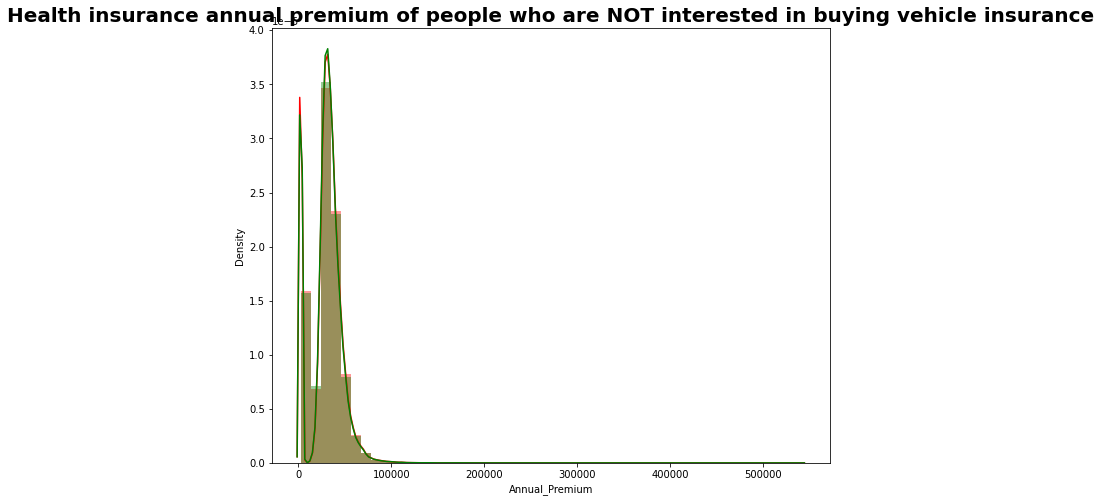

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data.Annual_Premium,color='red',label='Annual Premium')
sns.distplot(data.Annual_Premium[data.Response==0],color='green')
plt.title('Health insurance annual premium of people who are NOT interested in buying vehicle insurance',fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()


<h1 style="background-color:lightgreen;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">correlation</h1>
<a id=11></a>

In [ ]:

correlation[['Annual_Premium']].sort_values(by='Annual_Premium',ascending=False).style.background_gradient(cmap='Blues')

,Annual_Premium
Annual_Premium,1.000000
Age,0.067507
Response,0.022575
Previously_Insured,0.004269
Vintage,-0.000608
Region_Code,-0.010588
Driving_License,-0.011906
Policy_Sales_Channel,-0.113247


<h1 style="background-color:blue;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;">Multivariate Analysis</h1>
<a id=24></a>

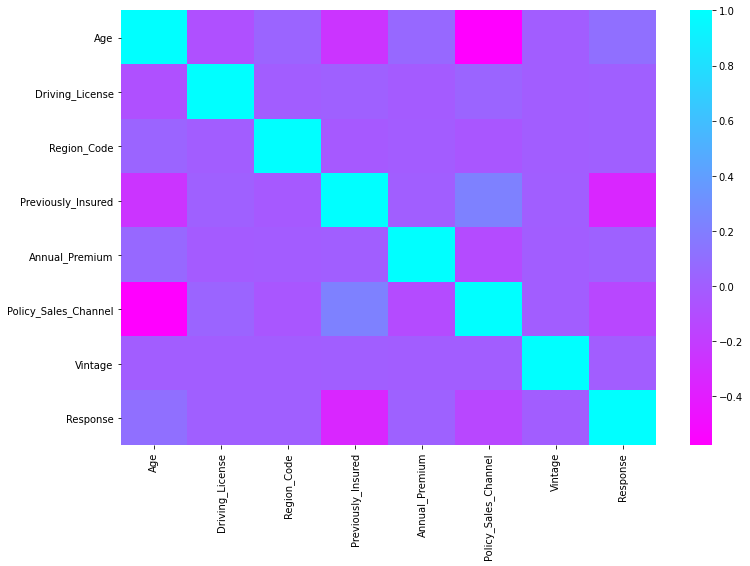

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,cmap='cool_r')
plt.show()

In [ ]:
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
#dropping Response Variable
data.drop(['Response'],inplace=True,axis=1)

In [ ]:
#Defining Preprocessing function
def preprocessor(x):
  encode = ["Gender",'Vehicle_Age','Vehicle_Damage','Driving_License']

  for col in encode:
      dummy = pd.get_dummies(x[col], prefix=col)
      x = pd.concat([x,dummy], axis=1)
      del x[col]

  return x

In [ ]:
data = preprocessor(data)

In [ ]:
data.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,44,28,0,40454,26,217,0,1,0,0,1,0,1,0,1
1,76,3,0,33536,26,183,0,1,1,0,0,1,0,0,1


In [ ]:
data.shape

(381109, 15)

In [ ]:
data.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,44,28,0,40454,26,217,0,1,0,0,1,0,1,0,1
1,76,3,0,33536,26,183,0,1,1,0,0,1,0,0,1


In [ ]:
#Checking null values in df
print(df.iloc[:,-1].isna().any())
print(df.iloc[:,-1].isnull().any())

False
False


#SMOTE

Since we have such an imbalanced dataset, we need to balance it out using either oversampling or undersampling. But, undersampling in not recommeded in this case because of huge difference in total counts and it would mean that we're losing important data.

So, we have used smote to oversample positive class.

In [ ]:
oversample=SMOTE()
X,y=oversample.fit_resample(data,df.iloc[:,-1])

In [ ]:
resampled_df=pd.DataFrame(X, columns=data.columns)

In [ ]:
resampled_df.head()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,44,28,0,40454,26,217,0,1,0,0,1,0,1,0,1
1,76,3,0,33536,26,183,0,1,1,0,0,1,0,0,1
2,47,28,0,38294,26,27,0,1,0,0,1,0,1,0,1
3,21,11,1,28619,152,203,0,1,0,1,0,1,0,0,1
4,29,41,1,27496,152,39,1,0,0,1,0,1,0,0,1


#Scaling numeric features

In [ ]:
from sklearn.preprocessing import StandardScaler

numer = ['Age','Annual_Premium','Policy_Sales_Channel','Vintage','Region_Code']
scaler =StandardScaler()
resampled_df[numer]=scaler.fit_transform(resampled_df[numer])
resampled_df.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,0.248872,0.127442,0,0.529237,-1.385674,0.755892,0,1,0,0,1,0,1,0,1
1,2.571490,-1.948337,0,0.141314,-1.385674,0.347132,0,1,1,0,0,1,0,0,1


#Splitting test train data

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(np.array(resampled_df),y,test_size=.1,random_state=42)

In [ ]:
train_x

array([[ 0.75694482,  1.12381603,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.41018102,  0.12744194,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.75694482, -0.37074511,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.11985382,  0.70866016,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.3479274 , -2.0313686 ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.98501839,  0.87472251,  0.        , ...,  1.        ,
         0.        ,  1.        ]])

In [ ]:
train_y

array([1, 1, 1, ..., 0, 0, 1])

#Model Building and evaluation

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">DecisionTreeClassifier</h1>
<a id=15></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(random_state=42,max_depth=8)
grid1=GridSearchCV(model1,param_grid={'max_depth':range(5,8)})
grid1.fit(train_x,train_y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=8,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 8)}, pre_dispatch='2*n_jobs',
   

In [ ]:
grid1.best_params_

{'max_depth': 7}

In [ ]:
classifier1=DecisionTreeClassifier(random_state=42,max_depth=7)
classifier1.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

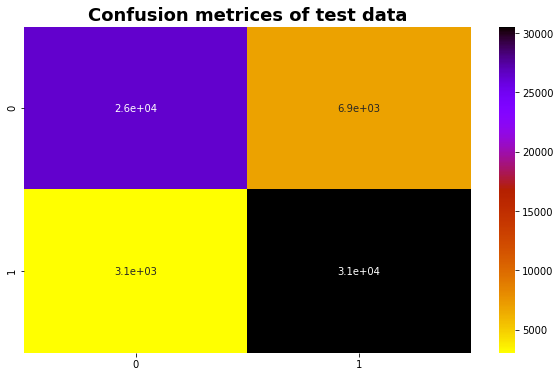

In [ ]:
pred_test_y=classifier1.predict(test_x)
pred_train_y=classifier1.predict(train_x)
cm1=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm1,annot=True,cmap='gnuplot_r')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84    301112
           1       0.81      0.91      0.86    300806

    accuracy                           0.85    601918
   macro avg       0.85      0.85      0.85    601918
weighted avg       0.85      0.85      0.85    601918



In [ ]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.90      0.79      0.84     33287
           1       0.82      0.91      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.86      0.85      0.85     66880
weighted avg       0.86      0.85      0.85     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">RandomForestClassifier</h1>
<a id=16></a>

In [ ]:
classifier2=RandomForestClassifier(random_state=42,max_depth=6)
classifier2.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

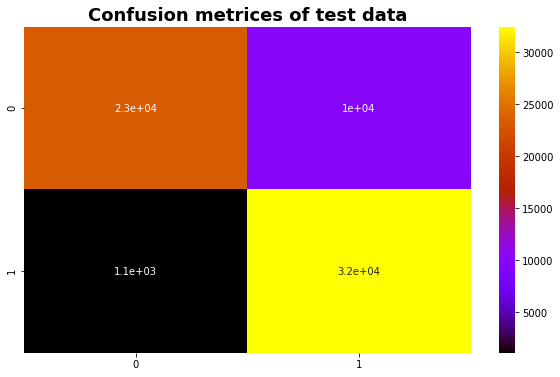

In [ ]:
pred_test_y=classifier2.predict(test_x)
pred_train_y=classifier2.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81    301112
           1       0.76      0.97      0.85    300806

    accuracy                           0.83    601918
   macro avg       0.86      0.83      0.83    601918
weighted avg       0.86      0.83      0.83    601918



In [ ]:
print('Classification report of train data \n',classification_report(test_y,pred_test_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.95      0.70      0.81     33287
           1       0.77      0.97      0.85     33593

    accuracy                           0.83     66880
   macro avg       0.86      0.83      0.83     66880
weighted avg       0.86      0.83      0.83     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Logistic Regression</h1>
<a id=17></a>

In [ ]:
classifier3=LogisticRegression(tol=0.01,max_iter=1000)
classifier3.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

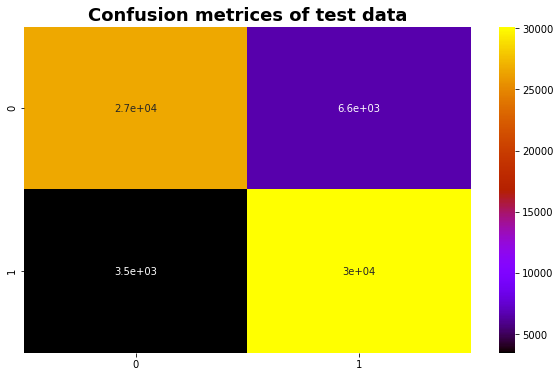

In [ ]:
pred_test_y=classifier3.predict(test_x)
pred_train_y=classifier3.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gnuplot')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84    301112
           1       0.82      0.90      0.85    300806

    accuracy                           0.85    601918
   macro avg       0.85      0.85      0.85    601918
weighted avg       0.85      0.85      0.85    601918



In [ ]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     33287
           1       0.82      0.90      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.85      0.85      0.85     66880
weighted avg       0.85      0.85      0.85     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">KNN Classifier</h1>
<a id=18></a>

In [ ]:
classifier4=KNeighborsClassifier(n_neighbors=100)
classifier4.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                     weights='uniform')

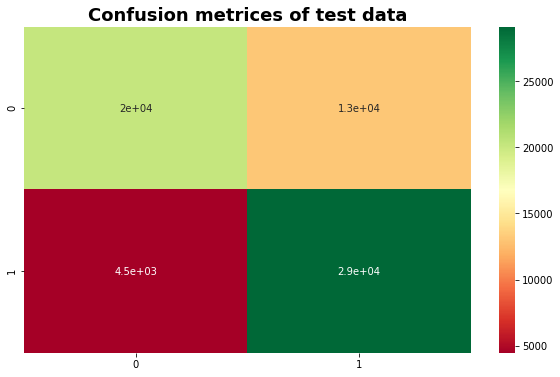

In [ ]:
pred_test_y=classifier4.predict(test_x)
pred_train_y=classifier4.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.82      0.61      0.70    301112
           1       0.69      0.87      0.77    300806

    accuracy                           0.74    601918
   macro avg       0.76      0.74      0.73    601918
weighted avg       0.76      0.74      0.73    601918




<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">XGBoostClassifier</h1>
<a id=19></a>

In [ ]:
classifier5=XGBClassifier()
classifier5.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

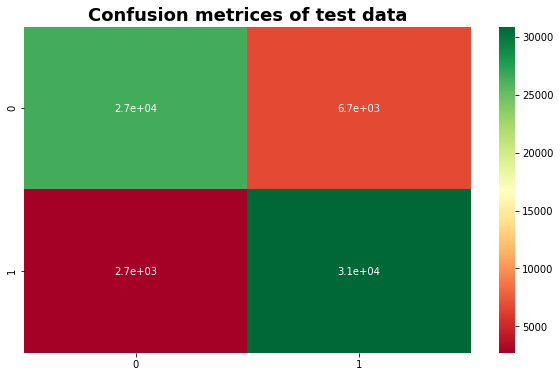

In [ ]:
pred_test_y=classifier5.predict(test_x)
pred_train_y=classifier5.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85    301112
           1       0.82      0.92      0.87    300806

    accuracy                           0.86    601918
   macro avg       0.86      0.86      0.86    601918
weighted avg       0.86      0.86      0.86    601918



In [ ]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85     33287
           1       0.82      0.92      0.87     33593

    accuracy                           0.86     66880
   macro avg       0.86      0.86      0.86     66880
weighted avg       0.86      0.86      0.86     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">GradientBoosting Classifier</h1>
<a id=20></a>

In [ ]:
classifier6=GradientBoostingClassifier(random_state=42)
classifier6.fit(train_x,train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

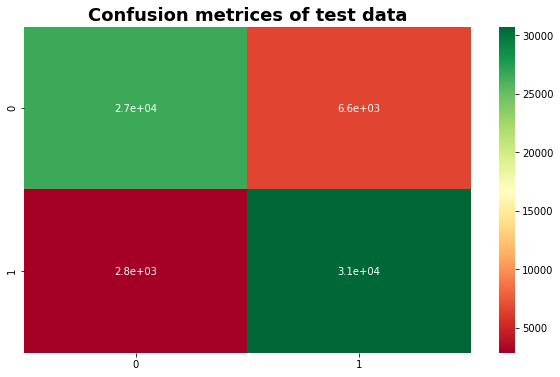

In [ ]:
pred_test_y=classifier6.predict(test_x)
pred_train_y=classifier6.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='RdYlGn')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85    301112
           1       0.82      0.92      0.87    300806

    accuracy                           0.86    601918
   macro avg       0.86      0.86      0.86    601918
weighted avg       0.86      0.86      0.86    601918



In [ ]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.90      0.80      0.85     33287
           1       0.82      0.92      0.87     33593

    accuracy                           0.86     66880
   macro avg       0.86      0.86      0.86     66880
weighted avg       0.86      0.86      0.86     66880



<h1 style="background-color:yellow;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">LinearSVC</h1>
<a id=22></a>

In [ ]:
classifier8=LinearSVC()
classifier8.fit(train_x,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

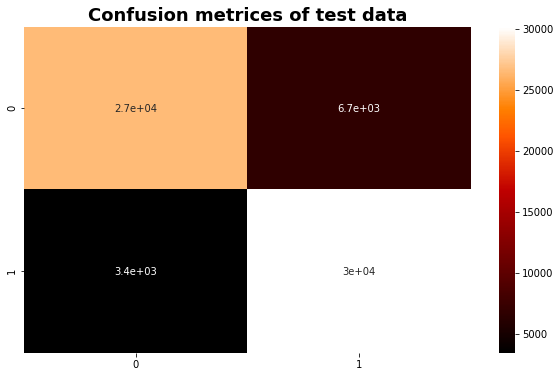

In [ ]:
pred_test_y=classifier8.predict(test_x)
pred_train_y=classifier8.predict(train_x)
cm2=confusion_matrix(test_y,pred_test_y)
plt.figure(figsize=(10,6))
sns.heatmap(cm2,annot=True,cmap='gist_heat')
plt.title('Confusion metrices of test data',fontdict={'fontsize':18,'fontweight':'bold'})
plt.show()

In [ ]:
print('Classification report of train data \n',classification_report(train_y,pred_train_y))

Classification report of train data 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84    301112
           1       0.82      0.90      0.85    300806

    accuracy                           0.85    601918
   macro avg       0.85      0.85      0.85    601918
weighted avg       0.85      0.85      0.85    601918



In [ ]:
print('Classification report of test data \n',classification_report(test_y,pred_test_y))

Classification report of test data 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     33287
           1       0.82      0.90      0.86     33593

    accuracy                           0.85     66880
   macro avg       0.85      0.85      0.85     66880
weighted avg       0.85      0.85      0.85     66880



#Model Saving

In [ ]:
import pickle
filename="xgboost_model.pkl"
with open(filename, 'wb') as file:
  pickle.dump(classifier5, file)

In [ ]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
print(df['Vintage'].max())
print(df['Vintage'].min())

299
10


#Testing

In [ ]:
model = pickle.load(open("xgboost_model.pkl", 'rb'))

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [ ]:
test_data=preprocessor(test_data)
test_data.head(2)

,id,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,381110,25,11.0,1,35786.0,152.0,53,0,1,0,1,0,1,0,0,1
1,381111,40,28.0,0,33762.0,7.0,111,0,1,1,0,0,0,1,0,1


In [ ]:
test_data.drop(['id'],inplace=True,axis=1)

In [ ]:
test_data[numer]=scaler.transform(test_data[numer])
test_data.head(2)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,-1.130182,-1.284088,1,0.267481,0.879408,-1.215777,0,1,0,1,0,1,0,0,1
1,-0.041455,0.127442,0,0.153987,-1.727234,-0.518479,0,1,1,0,0,0,1,0,1


In [ ]:
test_data.shape

(127037, 15)

In [ ]:
test_X= np.array(test_data)

In [ ]:
test_X

array([[-1.130182  , -1.28408803,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.04145499,  0.12744194,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.46661761,  0.12744194,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.4205092 ,  1.62200308,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 2.20858082,  0.12744194,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.03112681,  0.21047311,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
preds=model.predict(test_X)

In [ ]:
preds

array([0, 1, 1, ..., 0, 0, 0])

#Saving scaler to deploy inference pipeline

In [ ]:
filename="scaler.pkl"
with open(filename, 'wb') as file:
  pickle.dump(scaler, file)

In [ ]:
test_data = pd.read_csv('test.csv')
test_data.drop(['id'],inplace=True,axis=1)

In [ ]:
test_data.head(2)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [ ]:
# Reads in saved Scaler
scaler = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
# scaler =StandardScaler()
processed_data=preprocessor(test_data) #Handling categorical variables
processed_data.iloc[:1,:5]=scaler.transform(processed_data[:1][numer])
processed_input_data=processed_data[:1]

In [ ]:
processed_input_data

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,-1.130182,0.267481,0.879408,-1.215777,-1.284088,53,0,1,0,1,0,1,0,0,1


In [ ]:
processed_data.iloc[:1,:5]=scaler.transform(processed_data[:1][numer])

In [ ]:
processed_data.shape

(127037, 15)

In [ ]:
processed_data

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,-3.026758,-1.739266,-1.876156,-1.215777,-2.175222,53,0,1,0,1,0,1,0,0,1
1,40.000000,28.000000,0.000000,33762.000000,7.000000,111,0,1,1,0,0,0,1,0,1
2,47.000000,28.000000,0.000000,40050.000000,124.000000,199,0,1,1,0,0,0,1,0,1
3,24.000000,27.000000,1.000000,37356.000000,152.000000,187,0,1,0,1,0,0,1,0,1
4,27.000000,28.000000,1.000000,59097.000000,152.000000,297,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,26.000000,37.000000,1.000000,30867.000000,152.000000,56,1,0,0,1,0,1,0,0,1
127033,38.000000,28.000000,0.000000,28700.000000,122.000000,165,1,0,1,0,0,0,1,0,1
127034,21.000000,46.000000,1.000000,29802.000000,152.000000,74,0,1,0,1,0,1,0,0,1
127035,71.000000,28.000000,1.000000,62875.000000,26.000000,265,0,1,1,0,0,1,0,0,1


In [ ]:
processed_data[:1]

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,-3.026758,-1.739266,-1.876156,-1.215777,-2.175222,53,0,1,0,1,0,1,0,0,1


In [ ]:
processed_input_data

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Driving_License_0,Driving_License_1
0,-1.130182,0.267481,0.879408,-1.215777,-1.284088,53,0,1,0,1,0,1,0,0,1


In [ ]:
pip freeze > requirements.txt